In [81]:
import numpy as np
from pathlib import Path
import pandas as pd
from skimage import io
from scipy.stats import zscore

from utilities import Experiment

from matplotlib import pyplot as plt
%matplotlib notebook
from ipywidgets import interact

import seaborn as sns
sns.set(style="ticks", palette="deep")
plt.style.use('v_arial')
c = sns.color_palette()

## Load experiment data

Load experiment with the Experiment class:

In [100]:
exp = Experiment(r"J:\_Shared\stytra\manuscript\datasets\cheap_setup\portugues_2011\181115_f1")

Use experiment class methods for loading logs from the experiment:

In [101]:
tail_log_df = exp.behavior_log.set_index("t")  # DataFrame with the tail trace
estm_log_df = exp.estimator_log.set_index("t")  # DataFrame with vigour estimator
stim_log_df = exp.stimulus_param_log.set_index("t")  # DataFrame with gratings data

<IPython.core.display.Javascript object>


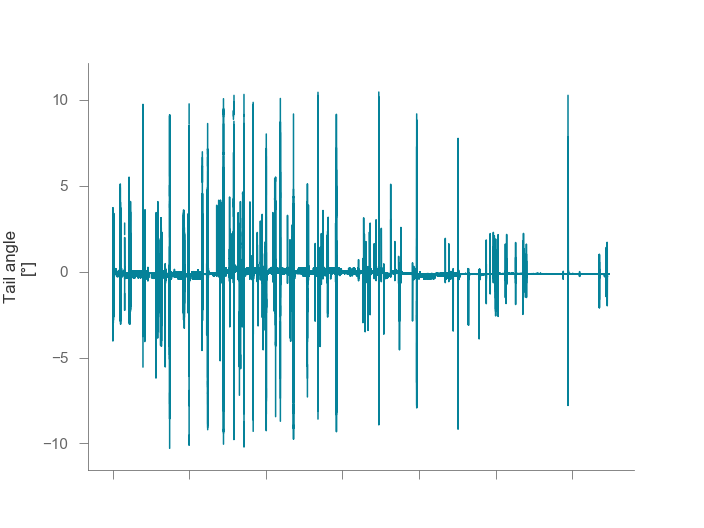

In [102]:
plt.figure()
plt.plot(tail_log_df["tail_sum"], c=c[0])
plt.gca().xaxis.set_ticklabels([])
plt.ylabel('Tail angle\n[°]')

In [103]:
# Find start and end times of every stimulus using the dataframe with the baseline grating velocity:
vel_arr = stim_log_df["closed loop 1D_base_vel"].as_matrix()
gain_arr = stim_log_df["closed loop 1D_gain"].as_matrix()
start_idxs = np.argwhere(np.diff(vel_arr) < 0)[:,0]
end_idxs = np.argwhere(np.diff(vel_arr) > 0)[:,0]

start_times = stim_log_df.index[start_idxs+1]
end_times = stim_log_df.index[end_idxs+1]
gains = gain_arr[start_idxs+1]

## Create figure with all the closed-loop experiment variables

<IPython.core.display.Javascript object>


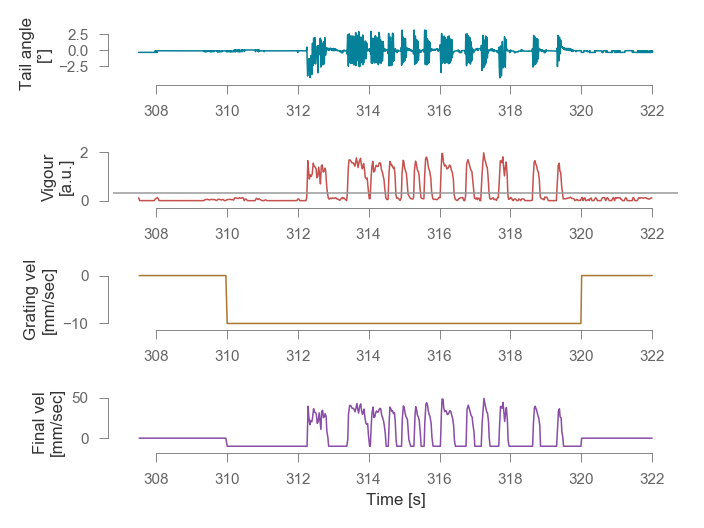

In [108]:

def f(s):
    t_slice = slice(start_times[s]-2.5, end_times[s]+2)  # select stimulus time

    for ax in axes:
        ax.clear()
    
    ax = axes[0]
    ax.plot(tail_log_df["tail_sum"][t_slice], c=c[0])
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel('Tail angle\n[°]')

    ax = axes[1]
    ax.plot(estm_log_df["vigour"][t_slice], c=c[1])
    ax.axhline(0.3, c=(0.6,)*3)
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel('Vigour\n[a.u.]')

    ax = axes[2]
    ax.plot(stim_log_df["closed loop 1D_base_vel"][t_slice], c=c[2])
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel('Grating vel\n[mm/sec]')
    ax.get_xaxis().set_visible(False)
    # sns.despine(bottom=True)

    ax = axes[3]
    ax.plot(stim_log_df["closed loop 1D_vel"][t_slice],  c=c[3])
    # plt.xticks(xticks)
    # plt.yticks([-15,0, 15])
    ax.set_ylabel('Final vel\n[mm/sec]')
    ax.set_xlabel('Time [s]')
    sns.despine(trim=True, offset=3)

    plt.tight_layout()
    
fig, axes = plt.subplots(4, 1, sharex=True)

In [105]:
interact(f, s=widgets.IntSlider(min=0,max=118,step=1,value=0))

A Jupyter Widget

<function __main__.f>

In [106]:
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['svg.fonttype'] = 'none'

fig.savefig("low_cost.svg", format="svg")